In [1]:
import qrcode

from docxtpl import DocxTemplate
import docxtpl
from docx.shared import Mm
import matplotlib.patches as mpatches
import requests

from matplotlib.lines import Line2D

In [2]:
import math
import contextily as ctx

import rasterio
from rasterio.plot import show

import collections

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

from descartes import PolygonPatch

In [4]:
# ruta de carpera donde estan las llaves
ruta = open('../ruta.txt')
ruta = ruta.readlines()[0]
ruta

'G:\\OneDrive - Ingenio Azucarero Guabira S.A\\_DATOS_PYTHON'

In [5]:
path_shp = r'G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\SHP\PLANIFICACION.shp'
path_shp_cat = r'G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\SHP\catastro140624.shp'
path_shp_rec = r'G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\SHP\RECORRIDOS.shp'

path_xlsx = r'G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\PARTE DIARIO TRICHOGRAMMA 2024_RES.xlsx'

In [6]:
df = pd.read_excel(path_xlsx)
len(df)

854

In [7]:
df = df[df['N° LABOR'].isna() & df['SEMANA']>0]
len(df)

83

In [8]:
# Asegurando que la columna FECHA esté en formato de texto
df['FECHA'] = pd.to_datetime(df['FECHA']).dt.strftime('%Y-%m-%d')
# Realizando la concatenación sin modificar el tipo de dato en el dataframe original
df['CONCATENADO'] = df['FECHA'] + '|' + df['COD PROPIEDAD'].astype(str) + '|' + df['COD CANERO'].astype(str)

In [9]:
df

,N° LABOR,FECHA,SEMANA,INSTITUCION,COD CANERO,NOMBRE CANERO,COD PROPIEDAD,NOMBRE PROPIEDAD,LOTE,HECTAREA,...,PILOTO 1,PILOTO 2,OBSERVACIONES,CONFORMIDAD CANERO,FINANCIADO,ID,OS,IDD,REPORTE,CONCATENADO
422,NaN,2024-08-22,34.0,69,20262,HEVIA Y VACA PEREZ BERNABE,791,LOS MONOS--HEBIA BERNABE,L1.2,7.726068,...,EDUARDO REYES,EDUARDO REYES,NaN,NaN,SOLICITUD,338.0,44.0,109.0,NaN,2024-08-22|791|20262
423,NaN,2024-08-22,34.0,69,20262,HEVIA Y VACA PEREZ BERNABE,791,LOS MONOS--HEBIA BERNABE,L20.2,2.083266,...,EDUARDO REYES,EDUARDO REYES,NaN,NaN,SOLICITUD,339.0,44.0,109.0,NaN,2024-08-22|791|20262
425,NaN,2024-08-22,34.0,62,2285,CUELLAR ZABALA ADALBERTO,628,TOBOROCHI--CUELLAR,L5.2,1.526489,...,EDUARDO REYES,EDUARDO REYES,NaN,NaN,SIEMBRA 2024,214.0,35.0,113.0,NaN,2024-08-22|628|2285
427,NaN,2024-08-22,34.0,62,2285,CUELLAR ZABALA ADALBERTO,628,TOBOROCHI--CUELLAR,L7,1.637936,...,EDUARDO REYES,EDUARDO REYES,NaN,NaN,SIEMBRA 2024,216.0,35.0,113.0,NaN,2024-08-22|628|2285
428,NaN,2024-08-22,34.0,62,2285,CUELLAR ZABALA ADALBERTO,628,TOBOROCHI--CUELLAR,L3.2,2.717453,...,EDUARDO REYES,EDUARDO REYES,NaN,NaN,SIEMBRA 2024,217.0,35.0,113.0,NaN,2024-08-22|628|2285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,NaN,2024-08-21,34.0,0,2765,DAVALOS GUARISTI MARIO,1714,PENOCO--DAVALOS MARIO,L6,2.705832,...,EDUARDO REYES,EDUARDO REYES,NaN,NaN,SIEMBRA 2024,867.0,60.0,125.0,NaN,2024-08-21|1714|2765
850,NaN,2024-08-21,34.0,0,2765,DAVALOS GUARISTI MARIO,990,MADREJON--MARIO DAVALOS,L9.3,0.804385,...,EDUARDO REYES,EDUARDO REYES,NaN,NaN,SIEMBRA 2024,868.0,60.0,124.0,NaN,2024-08-21|990|2765
851,NaN,2024-08-21,34.0,0,2765,DAVALOS GUARISTI MARIO,990,MADREJON--MARIO DAVALOS,L5,2.060354,...,EDUARDO REYES,EDUARDO REYES,NaN,NaN,SIEMBRA 2024,869.0,60.0,124.0,NaN,2024-08-21|990|2765
852,NaN,2024-08-21,34.0,0,2765,DAVALOS GUARISTI MARIO,1204,TOCAYO--MARIO DAVALOS,L2.1,1.130436,...,EDUARDO REYES,EDUARDO REYES,NaN,NaN,SIEMBRA 2024,870.0,60.0,123.0,NaN,2024-08-21|1204|2765


In [10]:
lista_cod = list(set(df['CONCATENADO']))

In [11]:
print(len(lista_cod))

17


In [12]:
lista_cod

['2024-08-20|510|1218',
 '2024-08-21|990|2765',
 '2024-08-21|1714|2765',
 '2024-08-22|791|20262',
 '2024-08-22|19|388',
 '2024-08-21|98|3421',
 '2024-08-21|98|2662',
 '2024-08-21|218|388',
 '2024-08-21|483|2662',
 '2024-08-22|1215|12478',
 '2024-08-21|1587|2285',
 '2024-08-21|1204|2765',
 '2024-08-22|1289|30035',
 '2024-08-22|628|2285',
 '2024-08-21|187|5421',
 '2024-08-21|1892|12478',
 '2024-08-21|218|18358']

In [13]:
lista_cod = ['2024-08-21|990|2765',
 '2024-08-21|1714|2765',
 '2024-08-22|791|20262',
 '2024-08-22|19|388',
 '2024-08-21|98|3421',
 '2024-08-21|98|2662',
 '2024-08-21|483|2662',
 '2024-08-22|1215|12478',
 '2024-08-21|1204|2765',
 '2024-08-22|1289|30035',
 '2024-08-22|628|2285',
 '2024-08-21|187|5421',
 '2024-08-21|1892|12478',
 '2024-08-21|218|18358']

In [17]:
lista_cod = ['2024-08-21|1714|2765']

INICIA ID:  2024-08-21|1714|2765


C:\Users\Usuario\AppData\Local\Temp\ipykernel_35748\4132094415.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  registro['FECHA'] = registro['FECHA'].astype(str)


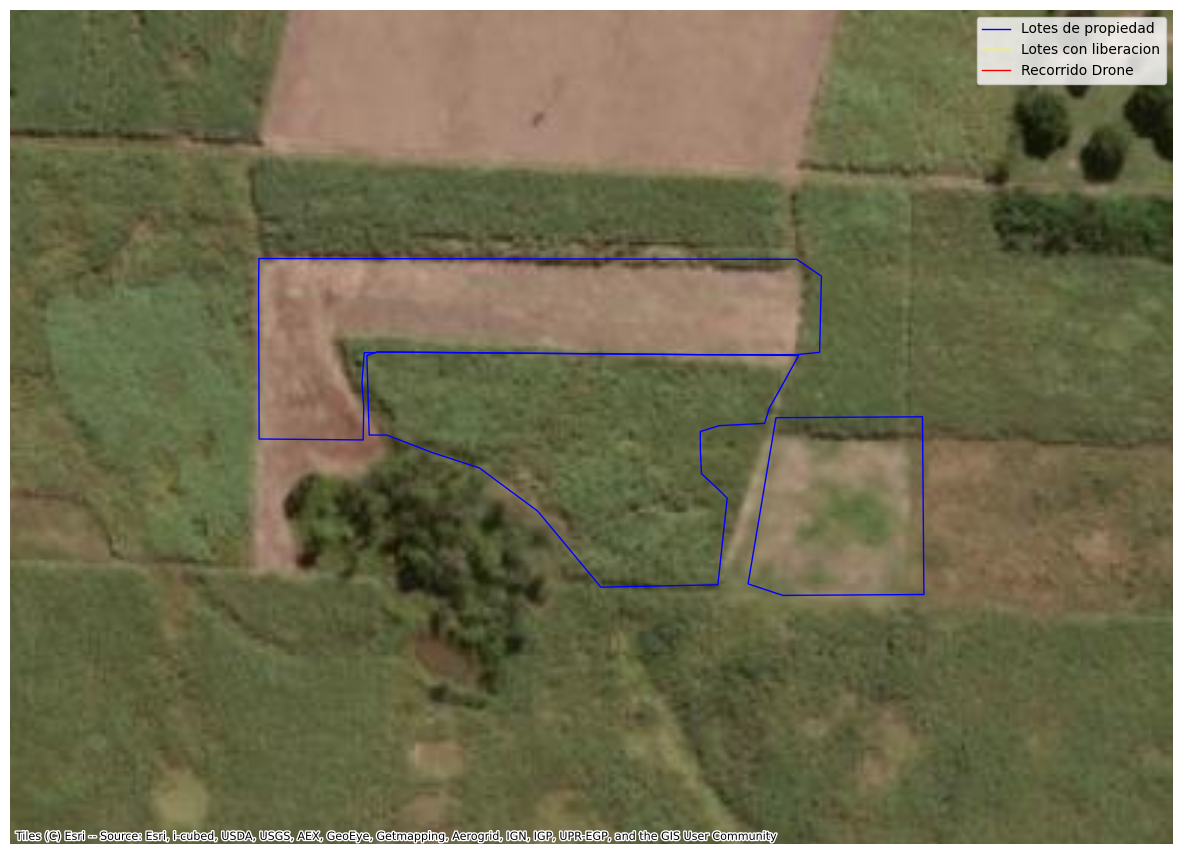

<Figure size 640x480 with 0 Axes>

In [18]:
cat = gpd.read_file(path_shp_cat)
rec = gpd.read_file(path_shp_rec)
for k in lista_cod:
    lista = k.split('|')
    cod_prop = lista[1].split('.')[0]
    cod_ca = lista[2]
    semana = lista[0]
    print('INICIA ID: ', k)
    registro = df[df['CONCATENADO'] == k]

    # ids de la tabla registro
    list_ids = list(set(registro['ID']))
    list_ids = [int(i) for i in list_ids]
    
    list_idds = list(set(registro['IDD']))
    list_idds = [int(i) for i in list_idds]
    
    registro['FECHA'] = registro['FECHA'].astype(str)
    data_rep = {
        'id_reg': str(registro['CONCATENADO'].iloc[0]), 
        'fecha' : registro['FECHA'].iloc[0],
        'nom_ca' : registro['NOMBRE CANERO'].iloc[0],
        'cod_ca' : registro['COD CANERO'].iloc[0],
        'nom_prop' : registro['NOMBRE PROPIEDAD'].iloc[0],
        'cod_prop' : registro['COD PROPIEDAD'].iloc[0],
        'inst' : int(registro['INSTITUCION'].iloc[0]),
        'total': round(registro['HECTAREA'].sum(), 2),
        
        'temp' : registro['TEMPERATURA'].iloc[0],
        'viento' : registro['VIENTO'].iloc[0],
        'humedad' : registro['HUMEDAD'].iloc[0],
        'cod_dron' : registro['COD DRONE'].iloc[0],
        'piloto1' : registro['PILOTO 1'].iloc[0],
        'piloto2' : registro['PILOTO 2'].iloc[0],
        'dron' : registro['COD DRONE'].iloc[0]
    }

    if data_rep['piloto1'] == data_rep['piloto2']:
        data_rep['piloto2'] = '-'
    
    data_rep2 = collections.namedtuple("data", data_rep.keys())(*data_rep.values())
    
    shp_apli = gpd.read_file(path_shp)
    #line = gpd.read_file(lineas)
    
    apli = pd.merge(shp_apli, registro, left_on='id', right_on='ID', how='inner')

    
    categorias = apli[['FINANCIADO', 'HECTAREA']]
    # Pivotar la tabla
    pivot_df = categorias.pivot_table(index='FINANCIADO', values='HECTAREA', aggfunc='sum')
    pivot_df_reset = pivot_df.reset_index()
    rcategorias = []
    for i, r in pivot_df_reset.iterrows():
        f = {
            'categoria' : r['FINANCIADO'],
            'total' : round(r['HECTAREA'], 2)
        }
        collec = collections.namedtuple("categoria", f.keys())(*f.values())
        rcategorias.append(collec)
    
    #apli = shp_apli[(shp_apli['unidad_01'] == int(cod_prop)) & (shp_apli['unidad_03'] == int(cod_ca)) & (shp_apli['semana'] == int(semana))]
    prop = cat[cat['unidad_01'] == int(cod_prop)]
    total_area = apli['area'].sum()
    total_ha = registro['HECTAREA'].sum()

    lotes = []
    for i, r in apli.iterrows():
        lote = {
            'nombre' : r['unidad_05'],
            'area' : round(r['area'], 2),
            'dron' : r['COD DRONE'],
            'tipo' : r['FINANCIADO']
        }
        collec = collections.namedtuple("lote", lote.keys())(*lote.values())
        lotes.append(collec)

    df_parte = pd.read_excel(path_xlsx)
    df_parte.loc[df_parte['ID'].isin(list_ids), 'N° LABOR'] = k.replace('|', '_')
    df_parte.to_excel(path_xlsx, index=False)
    
    filename_img = str(data_rep['cod_ca']) + '_' + str(data_rep['cod_prop']) + '_' + data_rep['fecha']
    
    #filtrado de la capa de recorridos
    rec_filtrado = rec[rec['idd'].isin(list_idds)]
    
    apli = apli.to_crs(epsg=3857)
    prop = prop.to_crs(epsg=3857)
    rec_filtrado = rec_filtrado.to_crs(epsg=3857)
    # Asegúrate de que 'gdf' es tu GeoDataFrame que ya tiene una columna 'geometry' con polígonos
    # Crea una figura y un eje con Matplotlib
    fig, ax = plt.subplots(figsize=(15, 15))
    
    #prop.plot(ax=ax, edgecolor='blue', facecolor='none', linewidth=1)
    #apli.plot(ax=ax, edgecolor='yellow', facecolor='none', linewidth=2)

    prop.plot(ax=ax, edgecolor='blue', facecolor='none', linewidth=1, label='Propiedad')
    apli.plot(ax=ax, edgecolor='yellow', facecolor='none', linewidth=2, label='Aplicación')
    rec_filtrado.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=1, label='Recorrido Drone')
    
    #line.plot(ax=ax, color='red', linestyle='--', linewidth=1)
    
    for idx, row in apli.iterrows():
        # Representa el punto central del polígono
        centroid = row.geometry.centroid
        # Anota el 'id' en el centro
        ax.annotate(
            text=row['unidad_05'] + ' \n' + str(round(row['area'], 2)) + 'ha', 
            xy=(centroid.x, centroid.y), 
            ha='center', 
            va='center', 
            weight=1000,
            fontsize=8,
            bbox=dict(facecolor=(1,1,1,0.3), edgecolor='none', pad=0))

    # Agregar la imagen de satélite como mapa base con Contextily
    ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)
    
    # Ajustar los límites del eje al área de los polígonos
    minx, miny, maxx, maxy = prop.total_bounds
    ax.set_xlim(minx - 100, maxx + 100)
    ax.set_ylim(miny - 100, maxy + 100)
    
    handle1 = Line2D([0], [0], color='blue', linewidth=1, linestyle='-', label='Lotes de propiedad')
    #handle2 = mpatches.Patch(color='yellow', label='Lotes con liberacion')
    handle2 = Line2D([0], [0], color='yellow', linewidth=1, linestyle='-', label='Lotes con liberacion')
    handle3 = Line2D([0], [0], color='red', linewidth=1, linestyle='-', label='Recorrido Drone')
    
    # Añade la leyenda con los handles creados
    ax.legend(handles=[handle1, handle2, handle3])
    
    # Omitir los ejes para una visualización más limpia
    ax.axis('off')

    #handles, labels = ax.get_legend_handles_labels()
    #ax.legend(handles, labels, loc='upper right')
    
    # Muestra el gráfico
    ruta_plano = ruta + '/planos/' + filename_img + '.jpeg'
    fig.savefig(ruta_plano, dpi = 300, bbox_inches='tight')
    plt.show()
    plt.clf()
    
    # Datos que quieres que contenga el QR
    texto = '''
    --UTEA--
    --LIBERACION DE TRICHOGRAMMA--

    Cod. de Liberacion: {nro_reg}
    Fecha de Liberacion: {fecha}
    Nombre de Canero: {canero}
    Codigo Canero: {cod_ca}
    Propiedad: {prop}'''\
    .format(
        nro_reg=data_rep['id_reg'], 
        fecha=data_rep['fecha'], 
        canero=data_rep['nom_ca'],
        cod_ca=data_rep['cod_ca'],
        prop=data_rep['nom_prop'])
    # Generar el código QR
    qr = qrcode.QRCode(
        version=1,
        error_correction=qrcode.constants.ERROR_CORRECT_L,
        box_size=10,
        border=4,
    )
    qr.add_data(texto)
    qr.make(fit=True)
    
    img = qr.make_image(fill_color="black", back_color="white")
    
    filename_qr = 'qr_' + str(data_rep['cod_ca']) + '_' + str(data_rep['cod_prop']) + '_' + data_rep['fecha']
    ruta_qr = ruta + '/planos/' + filename_qr + '.png'
    # Guardar el código QR en un archivo
    img.save(ruta_qr)
    
    doc = DocxTemplate(ruta + "/templates/tpl_rpt_liberacion_tricho.docx")
    in_line_plano = docxtpl.InlineImage(doc, image_descriptor=ruta_plano, width=Mm(150))
    in_line_qr = docxtpl.InlineImage(doc, image_descriptor=ruta_qr, width=Mm(30))
    context = {'data':data_rep2, 'lotes':lotes, 'rcat':rcategorias, 'plano':in_line_plano, 'qr':in_line_qr}
    doc.render(context)
    filename = str(data_rep['id_reg']) + '_' + data_rep['nom_ca']
    filename = filename.replace('|', '_')
    doc.save(ruta + '/informes/_' + filename + '.docx')

In [17]:
lista_cod

['30|41594|45',
 '333|6550|45',
 '1816|1180|45',
 '674|41973|45',
 '216|75|45',
 '63|2641|44',
 '126|42165|45',
 '519|10650|45',
 '265|41966|45',
 '256|75|45',
 '791|20262|45',
 '55|86|45',
 '1911|12190|45',
 '299|1530|45',
 '1817|1171|45',
 '50|5373|44',
 '220|2641|44',
 '13|86|45']

In [45]:
lista = lista_cod[1].split('|')

In [46]:
cod_prop = lista[0]
cod_ca = lista[1]
semana = lista[2]

In [47]:
registro = df[df['IDD']==lista_cod[1]]
registro

,Nº DE LABOR,FECHA,SEMANA,INSTITUCIÓN,COD CAÑERO,NOMBRE CAÑERO,COD PROPIEDAD,NOMBRE DE PROPIEDAD,LABOR_REALIZADA,HORA DE INICIO,...,DOSIS,OPERACIÓN DETENIDA POR:,COD DRONE,PILOTO,NRO. LIBERACION,OBSERVACIONES,CONFORMIDAD DEL CAÑERO/SUPERVISOR,ORIGEN,IDD,REPORTE
246,B-31,2023-11-09,45,69,6550,JUSTINIANO PEREYRA ALVARO,333,LA CUTA--JUSTINIANO,LIBERACION DE TRICHOGRAMMA,22:43:00,...,0.6,VELOCIDAD DEL VIENTO,PHANTON 4,JOSUE CANEDO,NaN,"NO SE LIBERO LOS LOTES C6; D7; D6,1; D3, POR M...",JHONNY COSIO,NaN,333|6550|45,NaN
247,B-31,2023-11-09,45,69,6550,JUSTINIANO PEREYRA ALVARO,333,LA CUTA--JUSTINIANO,LIBERACION DE TRICHOGRAMMA,22:43:00,...,0.6,VELOCIDAD DEL VIENTO,PHANTON 4,JOSUE CANEDO,NaN,"NO SE LIBERO LOS LOTES C6; D7; D6,1; D3, POR M...",JHONNY COSIO,NaN,333|6550|45,NaN
248,B-31,2023-11-09,45,69,6550,JUSTINIANO PEREYRA ALVARO,333,LA CUTA--JUSTINIANO,LIBERACION DE TRICHOGRAMMA,22:43:00,...,0.6,VELOCIDAD DEL VIENTO,PHANTON 4,JOSUE CANEDO,NaN,"NO SE LIBERO LOS LOTES C6; D7; D6,1; D3, POR M...",JHONNY COSIO,NaN,333|6550|45,NaN
249,B-31,2023-11-09,45,69,6550,JUSTINIANO PEREYRA ALVARO,333,LA CUTA--JUSTINIANO,LIBERACION DE TRICHOGRAMMA,22:43:00,...,0.6,VELOCIDAD DEL VIENTO,PHANTON 4,JOSUE CANEDO,NaN,"NO SE LIBERO LOS LOTES C6; D7; D6,1; D3, POR M...",JHONNY COSIO,NaN,333|6550|45,NaN
250,B-31,2023-11-09,45,69,6550,JUSTINIANO PEREYRA ALVARO,333,LA CUTA--JUSTINIANO,LIBERACION DE TRICHOGRAMMA,22:43:00,...,0.6,VELOCIDAD DEL VIENTO,PHANTON 4,JOSUE CANEDO,NaN,"NO SE LIBERO LOS LOTES C6; D7; D6,1; D3, POR M...",JHONNY COSIO,NaN,333|6550|45,NaN
251,B-31,2023-11-09,45,69,6550,JUSTINIANO PEREYRA ALVARO,333,LA CUTA--JUSTINIANO,LIBERACION DE TRICHOGRAMMA,22:43:00,...,0.6,VELOCIDAD DEL VIENTO,PHANTON 4,JOSUE CANEDO,NaN,"NO SE LIBERO LOS LOTES C6; D7; D6,1; D3, POR M...",JHONNY COSIO,NaN,333|6550|45,NaN


In [48]:
registro['FECHA'] = registro['FECHA'].astype(str)

C:\Users\Usuario\anaconda3\envs\utea_reportes\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
registro.columns

Index(['Nº DE LABOR', 'FECHA', 'SEMANA', 'INSTITUCIÓN', 'COD CAÑERO',
       'NOMBRE CAÑERO', 'COD PROPIEDAD', 'NOMBRE DE PROPIEDAD',
       'LABOR_REALIZADA', 'HORA DE INICIO', 'HORA FINAL', 'TEMPERATURA °C',
       'VIENTO', 'HUMEDAD', 'LOTE', 'HECTÁREAS', 'PRODUCTO', 'DOSIS',
       'OPERACIÓN DETENIDA POR:', 'COD DRONE', 'PILOTO', 'NRO. LIBERACION',
       'OBSERVACIONES', 'CONFORMIDAD DEL CAÑERO/SUPERVISOR', 'ORIGEN', 'IDD',
       'REPORTE'],
      dtype='object')

In [50]:
data_rep = {
    'nro_reg': '000' + str(registro['Nº DE LABOR'].iloc[0]), 
    'fecha' : registro['FECHA'].iloc[0],
    'nom_ca' : registro['NOMBRE CAÑERO'].iloc[0],
    'cod_ca' : registro['COD CAÑERO'].iloc[0],
    'nom_prop' : registro['NOMBRE DE PROPIEDAD'].iloc[0],
    'cod_prop' : registro['COD PROPIEDAD'].iloc[0],
    'inst' : int(registro['INSTITUCIÓN'].iloc[0]),
    'total': registro['HECTÁREAS'].sum(),
    
    'temp' : registro['TEMPERATURA °C'].iloc[0],
    'viento' : registro['VIENTO'].iloc[0],
    'humedad' : registro['HUMEDAD'].iloc[0],
    'cod_dron' : registro['COD DRONE'].iloc[0],
    'piloto' : registro['PILOTO'].iloc[0]
}
data_rep

{'nro_reg': '000B-31',
 'fecha': '2023-11-09',
 'nom_ca': 'JUSTINIANO PEREYRA ALVARO',
 'cod_ca': 6550,
 'nom_prop': 'LA CUTA--JUSTINIANO',
 'cod_prop': 333,
 'inst': 69,
 'total': 29.0,
 'temp': 30,
 'viento': 0,
 'humedad': 69,
 'cod_dron': 'PHANTON 4',
 'piloto': 'JOSUE CANEDO'}

In [51]:
data_rep2 = collections.namedtuple("data", data_rep.keys())(*data_rep.values())
data_rep2

data(nro_reg='000B-31', fecha='2023-11-09', nom_ca='JUSTINIANO PEREYRA ALVARO', cod_ca=6550, nom_prop='LA CUTA--JUSTINIANO', cod_prop=333, inst=69, total=29.0, temp=30, viento=0, humedad=69, cod_dron='PHANTON 4', piloto='JOSUE CANEDO')

In [52]:
shp_apli = gpd.read_file(path_shp)

In [53]:
cat = gpd.read_file(path_shp_cat)

In [54]:
apli = shp_apli[(shp_apli['unidad_01'] == int(cod_prop)) & (shp_apli['semana'] == int(semana))]

In [55]:
prop = cat[cat['unidad_01'] == int(cod_prop)]

In [56]:
apli.head(3)

,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,variedad23,textura,...,soca,cultivo,zona,fs23,ins,finan2023,area,Tecnico,semana,geometry
939,00003330000A-4,333,LA CUTA--JUSTINIANO,6550,JUSTINIANO PEREYRA ALVARO,A-4,RB-2,2020-04-10,None,F,...,2,canha,69,None,69,None,6.25,None,45,"POLYGON Z ((489100.657 8082544.414 0.000, 4890..."
940,00003330000A-11,333,LA CUTA--JUSTINIANO,6550,JUSTINIANO PEREYRA ALVARO,A-11,RB-2,2021-05-15,None,FY,...,1,canha,69,None,69,None,4.60,None,45,"POLYGON Z ((489517.492 8082644.587 0.000, 4896..."
941,00003330000B-6,333,LA CUTA--JUSTINIANO,6550,JUSTINIANO PEREYRA ALVARO,B-6,RENOVACION,None,RB-2,FA,...,122,siembra,69,2023-05-30,69,PROPIO,5.16,None,45,"POLYGON Z ((490481.443 8083498.742 0.000, 4905..."


In [57]:
apli['area'].sum()

30.709433708639995

In [58]:
registro.columns

Index(['Nº DE LABOR', 'FECHA', 'SEMANA', 'INSTITUCIÓN', 'COD CAÑERO',
       'NOMBRE CAÑERO', 'COD PROPIEDAD', 'NOMBRE DE PROPIEDAD',
       'LABOR_REALIZADA', 'HORA DE INICIO', 'HORA FINAL', 'TEMPERATURA °C',
       'VIENTO', 'HUMEDAD', 'LOTE', 'HECTÁREAS', 'PRODUCTO', 'DOSIS',
       'OPERACIÓN DETENIDA POR:', 'COD DRONE', 'PILOTO', 'NRO. LIBERACION',
       'OBSERVACIONES', 'CONFORMIDAD DEL CAÑERO/SUPERVISOR', 'ORIGEN', 'IDD',
       'REPORTE'],
      dtype='object')

In [59]:
registro['HECTÁREAS'].sum()

29.0

In [64]:
total_area = apli['area'].sum()
total_area

30.709433708639995

In [65]:
total_ha = registro['HECTÁREAS'].sum()
total_ha

29.0

In [66]:
diff = total_ha - total_area
diff

-1.7094337086399953

In [67]:
if diff > 0:
    cantidad = len(apli)
    incre = diff / cantidad
    apli['area'] = apli['area'] + incre
else:
    diff = diff * (-1)
    cantidad = len(apli)
    incre = diff / cantidad
    apli['area'] = apli['area'] - incre

C:\Users\Usuario\anaconda3\envs\utea_reportes\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [69]:
apli['area'].sum()

29.000000000000007

In [70]:
apli['area']

939     5.965094
940     4.315094
941     4.875094
1048    7.384888
1049    3.437190
1050    3.022639
Name: area, dtype: float64

In [72]:
lotes = []
for i, r in apli.iterrows():
    lote = {
        'nombre' : r['unidad_05'],
        'area' : round(r['area'], 2)
    }
    collec = collections.namedtuple("lote", lote.keys())(*lote.values())
    lotes.append(collec)
lotes

[lote(nombre='A-4', area=5.97),
 lote(nombre='A-11', area=4.32),
 lote(nombre='B-6', area=4.88),
 lote(nombre='A-3', area=7.38),
 lote(nombre='A-13', area=3.44),
 lote(nombre='B-8', area=3.02)]

In [73]:
filename_img = str(data_rep['cod_ca']) + '_' + str(data_rep['cod_prop']) + '_' + data_rep['fecha']
filename_img

'6550_333_2023-11-09'

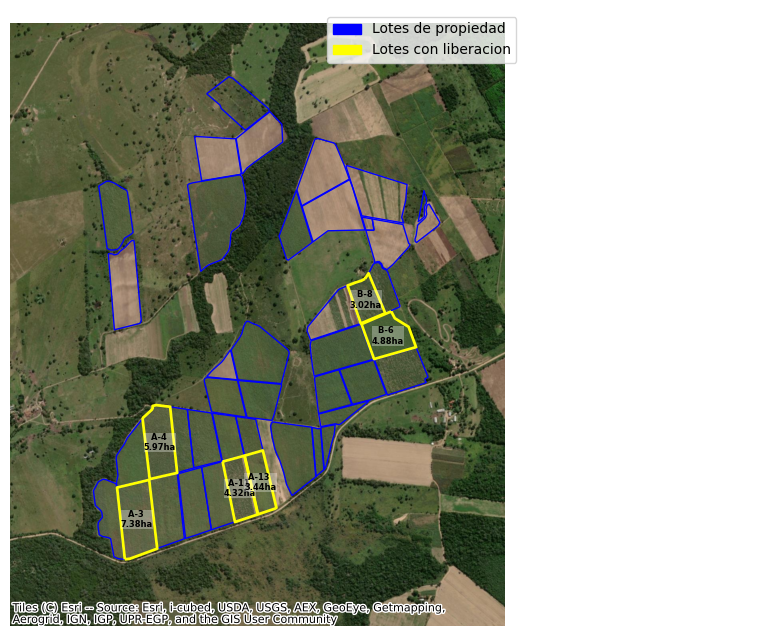

<Figure size 640x480 with 0 Axes>

In [74]:
apli = apli.to_crs(epsg=3857)
prop = prop.to_crs(epsg=3857)
# Asegúrate de que 'gdf' es tu GeoDataFrame que ya tiene una columna 'geometry' con polígonos
# Crea una figura y un eje con Matplotlib
fig, ax = plt.subplots(figsize=(12, 8))

prop.plot(ax=ax, edgecolor='blue', facecolor='none', linewidth=1)
# Grafica los polígonos utilizando la función plot de Geopandas
# 'edgecolor' es el color del borde, 'facecolor' es el color de relleno
apli.plot(ax=ax, edgecolor='yellow', facecolor='none', linewidth=2)

for idx, row in apli.iterrows():
    # Representa el punto central del polígono
    centroid = row.geometry.centroid
    # Anota el 'id' en el centro
    ax.annotate(
        text=row['unidad_05'] + ' \n' + str(round(row['area'], 2)) + 'ha', 
        xy=(centroid.x, centroid.y), 
        ha='center', 
        va='center', 
        weight=1000,
        fontsize=6,
        bbox=dict(facecolor=(1,1,1,0.3), edgecolor='none', pad=0))


# Agregar la imagen de satélite como mapa base con Contextily
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)

# Ajustar los límites del eje al área de los polígonos
#ax.set_xlim(apli.total_bounds[[0, 2]])
#ax.set_ylim(apli.total_bounds[[1, 3]])

minx, miny, maxx, maxy = prop.total_bounds
ax.set_xlim(minx - 500, maxx + 500)
ax.set_ylim(miny - 400, maxy + 400)

handle1 = mpatches.Patch(color='blue', label='Lotes de propiedad')
handle2 = mpatches.Patch(color='yellow', label='Lotes con liberacion')

# Añade la leyenda con los handles creados
ax.legend(handles=[handle1, handle2])

# Omitir los ejes para una visualización más limpia
ax.axis('off')

# Muestra el gráfico
ruta_plano = ruta + '/planos/' + filename_img + '.jpeg'
fig.savefig(ruta_plano, dpi = 300, bbox_inches='tight')
plt.show()
plt.clf()

In [75]:
ruta

'G:\\OneDrive - Ingenio Azucarero Guabira S.A\\_DATOS_PYTHON'

In [76]:
lista_imgs = []

In [77]:
lista_imgs.append(ruta_plano)

In [78]:
ruta_plano

'G:\\OneDrive - Ingenio Azucarero Guabira S.A\\_DATOS_PYTHON/planos/6550_333_2023-11-09.jpeg'

In [79]:
data_rep

{'nro_reg': '000B-31',
 'fecha': '2023-11-09',
 'nom_ca': 'JUSTINIANO PEREYRA ALVARO',
 'cod_ca': 6550,
 'nom_prop': 'LA CUTA--JUSTINIANO',
 'cod_prop': 333,
 'inst': 69,
 'total': 29.0,
 'temp': 30,
 'viento': 0,
 'humedad': 69,
 'cod_dron': 'PHANTON 4',
 'piloto': 'JOSUE CANEDO'}

In [80]:
# Datos que quieres que contenga el QR
texto = '''
--UTEA--
--LIBERACION DE TRICHOGRAMMA--

Numero de Liberacion: {nro_reg}
Fecha de Liberacion: {fecha}
Nombre de Canero: {canero}
Codigo Canero: {cod_ca}
Propiedad: {prop}
Total Area Liberada: {area} ha'''\
.format(
    nro_reg=data_rep['nro_reg'], 
    fecha=data_rep['fecha'], 
    canero=data_rep['nom_ca'],
    cod_ca=data_rep['cod_ca'],
    prop=data_rep['nom_prop'],
    area=data_rep['total'])
# Generar el código QR
qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=4,
)
qr.add_data(texto)
qr.make(fit=True)

img = qr.make_image(fill_color="black", back_color="white")

filename_qr = 'qr_' + str(data_rep['cod_ca']) + '_' + str(data_rep['cod_prop']) + '_' + data_rep['fecha']
ruta_qr = ruta + '/planos/' + filename_qr + '.png'
# Guardar el código QR en un archivo
img.save(ruta_qr)

In [81]:
ruta_qr

'G:\\OneDrive - Ingenio Azucarero Guabira S.A\\_DATOS_PYTHON/planos/qr_6550_333_2023-11-09.png'

In [82]:
ruta_plano

'G:\\OneDrive - Ingenio Azucarero Guabira S.A\\_DATOS_PYTHON/planos/6550_333_2023-11-09.jpeg'

In [84]:
doc = DocxTemplate(ruta + "/templates/tpl_rpt_liberacion_tricho.docx")
in_line_plano = docxtpl.InlineImage(doc, image_descriptor=ruta_plano, width=Mm(170))
in_line_qr = docxtpl.InlineImage(doc, image_descriptor=ruta_qr, width=Mm(30))
context = {'data':data_rep2, 'lotes':lotes, 'plano':in_line_plano, 'qr':in_line_qr}
doc.render(context)
filename = str(data_rep['cod_ca']) + '_' + data_rep['nom_ca'] + '_' + data_rep['fecha']
doc.save(ruta + '/informes/' + filename + '.docx')